# Setup

In [1]:
import vectorizer as vr
import cluster as clst
import analyze as anlz
from LM_vectorizer import batchify, get_docs_repr
import create_vec
# import data
from dataloader import *
%matplotlib inline
from EDA import *
import opts

/cortex/users/gilad/anaconda3/envs/ds_project/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  return f(*args, **kwds)
/cortex/users/gilad/anaconda3/envs/ds_project/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility
  return f(*args, **kwds)


In [2]:
path = '/cortex/users/taitelh/ds_project/data/df_files_max_df_0.05_min_df_0.0001/df_files_max_df_0.05_min_df_0.0001/'

In [3]:
corpus = Dataloader(None, path)

In [4]:
labels_names = [corpus.target_names[x] for x in corpus.labels]
raw_labels_names = [corpus.target_names[x] for x in corpus.raw_labels]
super_class_labels_names = corpus.super_class_labels_by_name
super_class_labels = corpus.super_class_labels
#os.chdir('/home/lab/vgilad/PycharmProjects/lstm_ds_project/18_12')
num_of_documents = len(corpus.only_encoded_docs)
labels = corpus.labels
pp_docs = [' '.join([corpus.decoder[str(w)] for w in doc]) for doc in corpus.only_encoded_docs]
emails = pp_docs
# emails = corpus.raw_data
# labels = corpus.raw_labels
example_idx = 0
number_of_labels = 20  # TODO magic number
number_of_labels_super = 6  # TODO magic number
max_df = 1.  
min_df = 0.  
num_of_documents = len(emails)
param = Params(vect_gilad, clust_kneams, aff_euclidean, link_ward, min_df, max_df, 20, num_of_documents,True)

# EDA

In [5]:
newsgroups_train = fetch_20newsgroups(subset='train')
labels = newsgroups_train.target
labels_names = newsgroups_train.target_names
emails = newsgroups_train.data
number_of_labels = 20  # TODO magic number

super_class_target_names = SUPER_CLASS_LIST
super_class2_ix = SUPER_CLASS2IX
super_class_dict = SUPER_CLASS_DICT
super_class_labels_by_name = [SUPER_CLASS_DICT[labels_names[l]] for l in labels]
super_class_labels = [SUPER_CLASS2IX[name] for name in super_class_labels_by_name]

### Histogram of labels

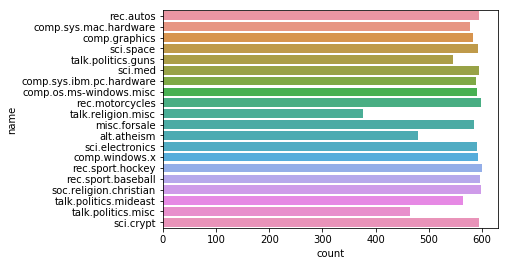

In [6]:
plot_hist(labels, labels_names)

### Histogram of super-class

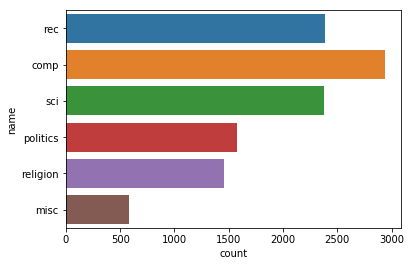

In [7]:
plot_hist(super_class_labels, super_class_target_names)

### Distribution of documents length 

maximum document length in the corpus 11821


/cortex/users/gilad/anaconda3/envs/ds_project/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


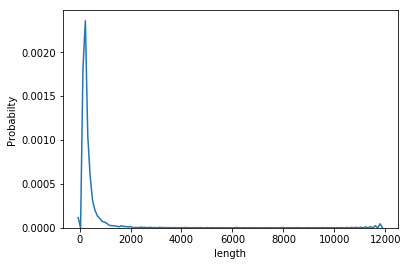

In [8]:
lengths = [len(x.split()) for x in emails]
print('maximum document length in the corpus ' + str(max(lengths)))
plot_lengths(lengths)

### Distribution of documents length by class

/cortex/users/gilad/anaconda3/envs/ds_project/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


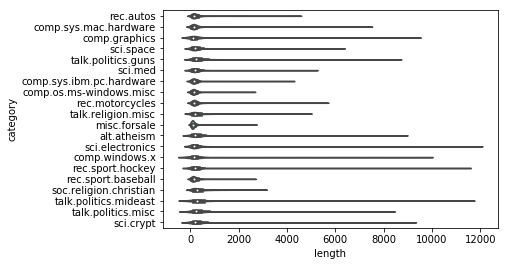

In [9]:
plot_lengths_by_cat(lengths, labels, labels_names)

/cortex/users/gilad/anaconda3/envs/ds_project/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


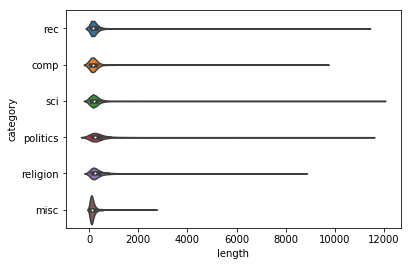

In [10]:
plot_lengths_by_cat(lengths, super_class_labels, super_class_target_names)

### TF & DF

1.0
      word  DF count  DF percentage      TF
86     the     10559       0.933269  146532
7       to     10150       0.897119   75064
75      of      9888       0.873961   69034
42       a      9936       0.878204   64195
8426    ax        29       0.002563   62406
160    and      9405       0.831271   57957
82       i      9558       0.844794   53036
22      in      9526       0.841966   49401
21      is      8596       0.759767   43480
225   that      8010       0.707972   39264
            word  DF count  DF percentage      TF
77       subject     11314       1.000000   12264
84          from     11314       1.000000   22670
2          lines     11277       0.996730   11835
74  organization     10867       0.960491   11233
86           the     10559       0.933269  146532
7             to     10150       0.897119   75064
42             a      9936       0.878204   64195
75            of      9888       0.873961   69034
82             i      9558       0.844794   53036
22          

/cortex/users/gilad/anaconda3/envs/ds_project/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


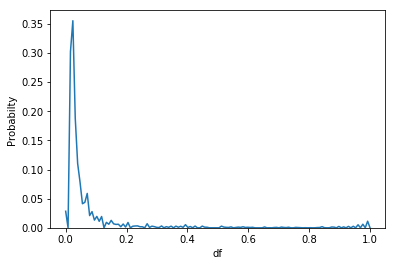

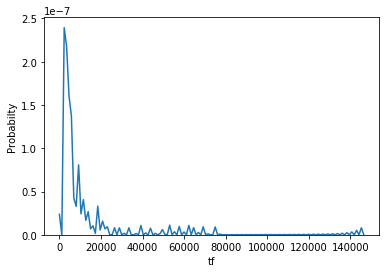

In [11]:
tf_vs_df(emails)

## Example document

### before preprocess

In [12]:
print(corpus.raw_data[corpus.encoded_docs[example_idx][0]])

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


### After preprocess

In [13]:
print(pp_docs[example_idx])


wondering car saw sports car looked late 60s early 70s doors small addition front bumper separate rest body model name engine specs production car history whatever info car


#  vectorizing 


In [14]:
if (param.vectorizing == vect_bow):
    # BOW
    cv, tokenized_emails = vr.tokenizer(emails, param.min_df, param.max_df)
    voc_names = cv.get_feature_names()
    emails_representation = tokenized_emails.toarray()
elif (param.vectorizing == vect_tfidf):
    # TF-IDF
    tf_idf = vr.tf_idf(emails, param.min_df, param.max_df)
    emails_representation = tf_idf.toarray()
elif (param.vectorizing == vect_w2v):
    # Word2Vec
    emails_representation = vr.BOW_w2v(emails,"w2v.pickle")
elif param.vectorizing == vect_LM:
    # LM
    with open(args.checkpoint, 'rb') as f:
        if args.cuda:
            model = torch.load(f).to(device)
        else:
            model = torch.load(f, map_location='cpu').to(device)
    model.eval()
    data = batchify(corpus.only_encoded_docs, 1, device)
    emails_representation = get_docs_repr(model, data)
elif param.vectorizing == vect_gilad:
    # LSTM + CNN
    
    # take only test documents (fist 1000 are val last 2000 are train)
    ntokens = len(corpus.decoder)
    num_of_documents = len(corpus.only_encoded_docs[1000:-2000])
    labels = corpus.labels[1000:-2000]
    pp_docs = [' '.join([corpus.decoder[str(w)] for w in doc]) for doc in
               corpus.only_encoded_docs]
    emails = pp_docs[1000:-2000]
    super_class_labels = corpus.super_class_labels[1000:-2000]
    super_class_labels_names = corpus.super_class_labels_by_name[1000:-2000]
    labels_names = [corpus.target_names[x] for x in labels]
    #opt = opts.parse_opt()
    emails_representation, labels_not_used = create_vec.vect()  # get numpy matrix
    # emails_representation = emails_representation[1000:-2000]

vecs and labels are loaded


# Plot TSNE

### Generate tsne representation

In [15]:
df = anlz.genrate_tsne(emails_representation, seed=4, perplexity=30)

compute tsne with perplexity 30 and seed 4


### Plot tsne

tsne by several sets of labels
label set #0
7122
arrived to tsne
arrived to tsne2


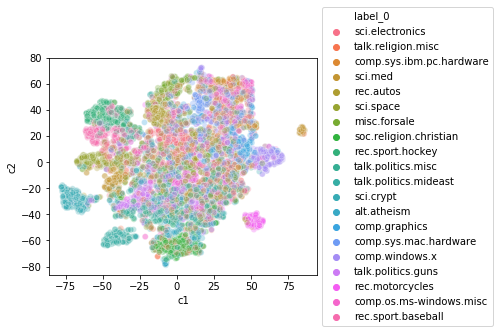

label set #1
7122
arrived to tsne
arrived to tsne2


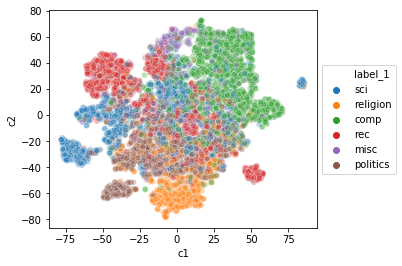

In [16]:
anlz.plot_tsne_df(df, (labels_names, super_class_labels_names))

# Clustering

In [17]:
        if (param.clustering == clust_kneams):
            if (param.affine == 'cosine'):
                # k-means cosine dist
                clusters, kmns_class = clst.kmeans_cosine_dist(emails_representation, param.k)
            elif (param.affine == 'euclidean'):  # k-means euclidean
                clusters, kmns_class = clst.kmeans(emails_representation, param.k)
                print('kmeans sum of distanses = %f' % kmns_class.inertia_)
        elif (param.clustering == clust_hirarchical):
            # hirarchical
            (clusters, _) = clst.hirarchical(emails_representation, param.k, aff=param.affine, link=param.linkage)

kmeans sum of distanses = 1701.537448


# Analayze

In [18]:
results,results_super_class = anlz.analyze_clustering(labels, clusters, number_of_labels,super_class_labels, number_of_labels_super, calc_linkage=False)
print('accuracy = %f' % results.get_list()[0])
print('average precision = %f' % results.get_list()[1])
print('average recall = %f' % results.get_list()[2])
print('accuracy (super_class) = %f' % results_super_class.get_list()[0])
print('average precision (super_class) = %f' % results_super_class.get_list()[1])
print('average recall (super_class) = %f' % results_super_class.get_list()[2])

accuracy = 0.434148
average precision = 0.392739
average recall = 0.413844
accuracy (super_class) = 0.690115
average precision (super_class) = 0.692612
average recall (super_class) = 0.637755


/home/lab/vgilad/PycharmProjects/lstm_ds_project/analyze.py:164: RuntimeWarning: invalid value encountered in true_divide
  precision = TP / (TP + FP)
